In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting=3)

In [3]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# Cleaning Text

In [11]:
import re #remove punctuations
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords #and, in, the, a ... etc
from nltk.stem.porter import PorterStemmer #change verbs 'liked to like'.. etc or simplifying each word by root of word

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i]) #replace anything that is not a letter like "" , ... with space
    review = review.lower()  #all letters to lower-case
    review = review.split() #splitting review in diferent words
    
    #stemming
    ps = PorterStemmer()
    stopwords1 = stopwords.words('english')
    stopwords1.remove('not')
    
    review = [ps.stem(f) for f in review if not f in set(stopwords1)] 
    review = ' '.join(review) #separating words with space and joining
    corpus.append(review)

In [13]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

# Tokenizing

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv = CountVectorizer(max_features=1500) 

In [23]:
X = cv.fit_transform(corpus).toarray()

In [24]:
y = data['Liked']

# Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
xtrain.shape

(800, 1500)

# Model

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
model1 = GaussianNB()

In [29]:
model1.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
predict1 = model1.predict(xtest)

In [56]:
print("Naive Bayes Test Accuracy: ", model1.score(xtest, ytest))

Naive Bayes Test Accuracy:  0.685


In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, predict1)
print(cm)

[[60 48]
 [15 77]]


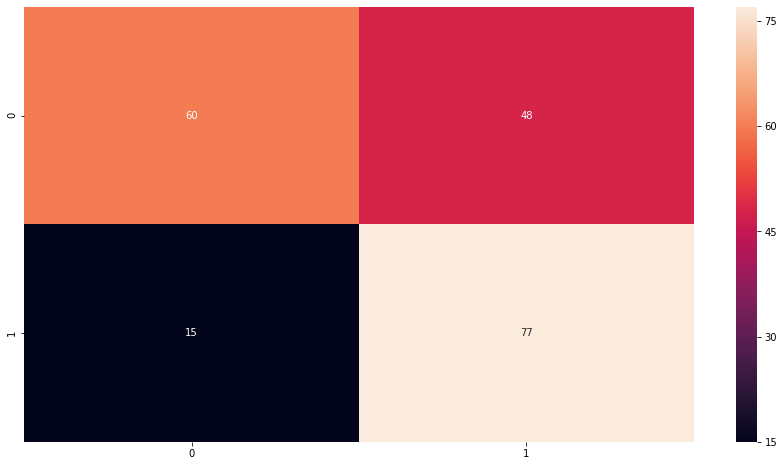

In [53]:
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True)

In [40]:
from sklearn.svm import SVC 

In [42]:
model2 = SVC()

In [43]:
model2.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
print("Support Vector Classifier Test Accuracy: ", model2.score(xtest, ytest))

Support Vector Classifier Test Accuracy:  0.825


In [45]:
predict2 = model2.predict(xtest)

In [46]:
cm2 = confusion_matrix(ytest, predict2)

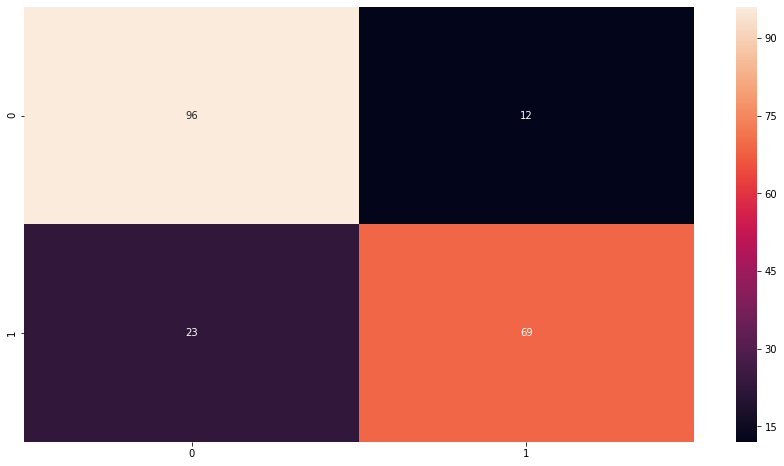

In [54]:
plt.figure(figsize=(15,8))
sns.heatmap(cm2, annot=True)

* ##  Support Vector Classifier achieved the highest accuracy of 82.5% while Naive Bayes achieved test accuracy of 68% 